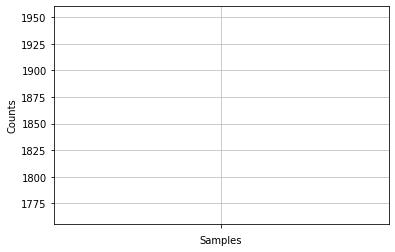

 : 1858


In [2]:
import string
from lxml import html
import requests
# Yelp unique url endings for each restaurant
restaurants = ['taco-bamba-falls-church','taco-bamba-vienna']
start_urls = ['http://www.yelp.com/biz/%s' % s for s in restaurants]
num_reviews = 1500 # Number of reviews you want
page_order = range(0, (num_reviews+1), 20)
review_dict = {}
for ur in start_urls:
    for o in page_order:
        page = requests.get(ur + ("?start=%s" % o))
        tree = html.fromstring(page.text)
        # This will extract the name of the business
        title = tree.xpath('//meta[@itemprop="name"]')[1].get("content")
        city = tree.xpath('//span[@itemprop="addressLocality"]/text()')
        city = city[0]
        # This will create a list of reviews
        reviews = tree.xpath('//p[@itemprop="description"]/text()')
        
        if reviews: # check if there is no review
        
            mod_reviews = []
            for rev in reviews:
                mod_reviews.append(str(rev))
            rest_city = (title,city)
            # This will add the reviews to a dictionary
            if rest_city in review_dict:
                review_dict[rest_city] += mod_reviews
            else:
                review_dict[rest_city] = mod_reviews

# The following part is to scrape Taco Bamba's menu to get its on menu food for its Falls Church store
rest_urls = "https://www.yelp.com/menu/taco-bamba-falls-church"
menu_page = requests.get(rest_urls)
tree = html.fromstring(menu_page.text)
menu = tree.xpath('//p[@class="menu-item-details-description"]/text()')
menu_str = ', '.join(menu).lower()
menu_unique = list(set(menu_str.split(', ')))

# The folliwng part is to tokenize and visualize most frequenct talked food in each of its location
from nltk import word_tokenize
from nltk.probability import FreqDist


review_fc = ' '.join(review_dict[('Taco Bamba', 'Falls Church')]).lower()
review_fc_str = review_fc.split(" ")
# Only keeps words from review comment that is in menu
review_foodword_fc = []
for comments_word in review_fc_str: 
    for food in menu_unique:
        if comments_word in food.split(" "):
            review_foodword_fc.append(comments_word)

# remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('&')
filtered_foodword_fc = [w for w in review_foodword_fc if not w in stop_words]
fc_freq = FreqDist(filtered_foodword_fc)
fc_freq.plot(30)

#output word frequency table to generate word cloud
for foodword in fc_freq:
    print (foodword, ":", fc_freq[foodword])